In [3]:
# import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv(r'/content/drive/MyDrive/oasis/Iris.csv')

In [6]:
# Displaying the dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **DATA PREPROCESING**


In [7]:
# Finding size of dataframe
df.shape

(150, 6)

In [8]:
# Removing unnecessary columns
df.drop('Id', axis=1, inplace=True)

In [9]:
# Rename the columns
df.rename(columns={'SepalLengthCm': 'SepalLength', 'SepalWidthCm': 'SepalWidth', 'PetalLengthCm': 'PetalLength', 'PetalWidthCm':'PetalWith'},inplace=True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWith,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWith    150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Checking for null values
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWith      0
Species        0
dtype: int64

In [12]:
# Total count of each attribute
df.count()

SepalLength    150
SepalWidth     150
PetalLength    150
PetalWith      150
Species        150
dtype: int64

# **DATA VISUALIZATION**

In [13]:
# Printing summary statistics
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWith
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


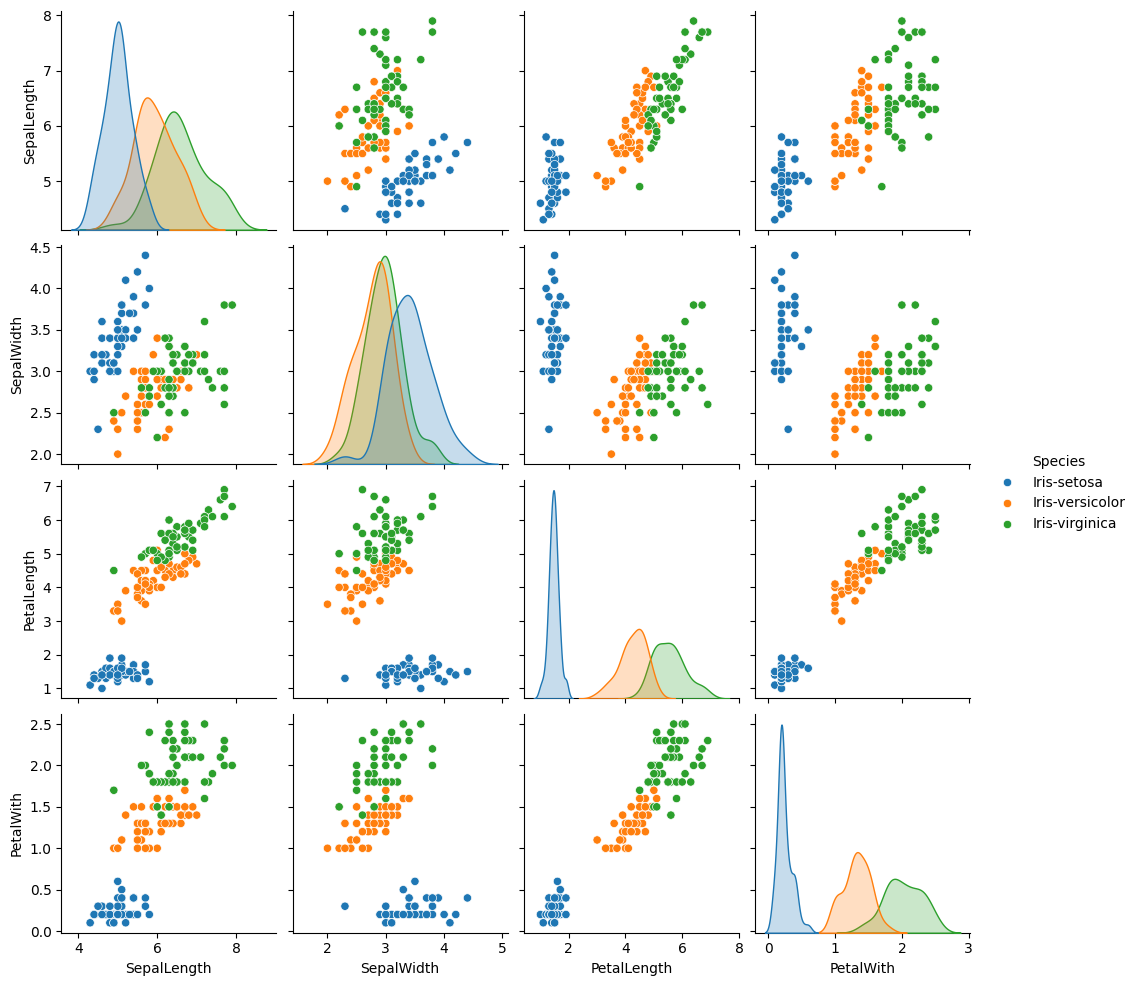

In [14]:
# Explore the dataset by visualizing the relationships between different features.
sns.pairplot(df, hue='Species')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

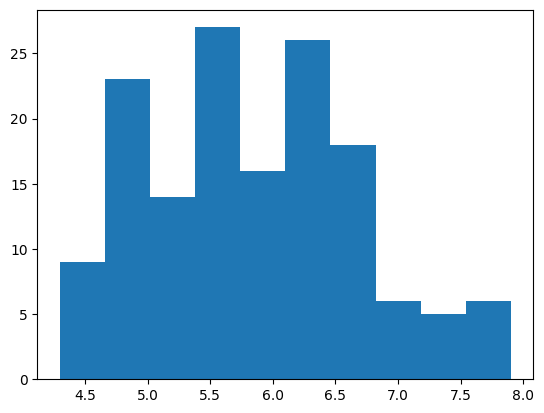

In [15]:
plt.hist(df['SepalLength'])


(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

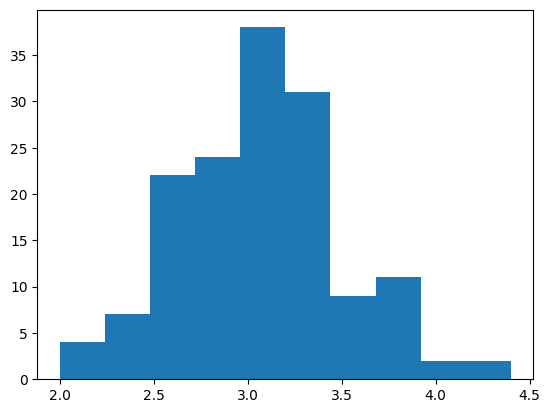

In [16]:
plt.hist(df['SepalWidth'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

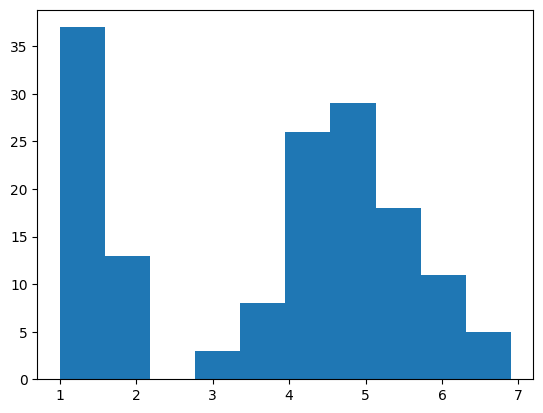

In [17]:
plt.hist(df['PetalLength'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

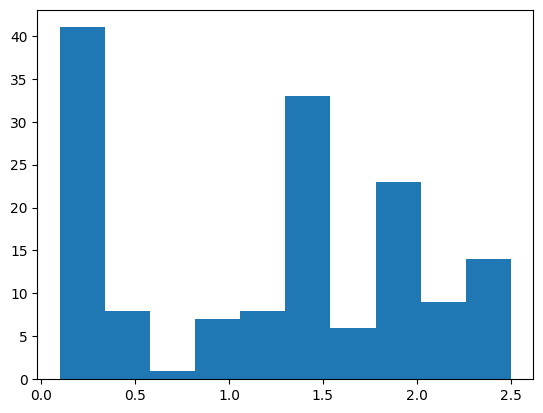

In [18]:
plt.hist(df['PetalWith'])

# **MODEL BUILDING**

In [19]:
# Importing  necessary libraries for  splitting the dataset
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the data into features and target
X=df.drop('Species',axis=1)
y=df['Species']

In [21]:
X.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWith
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
y.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: Species, dtype: object

In [23]:
# Splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3, random_state=0)

In [24]:
# Importing libraries for the classifier models
from sklearn.linear_model import LogisticRegression

In [25]:
# Creating an instance of the ML models
lr = LogisticRegression()

# Training the models with training dataset
lr.fit(X_train,y_train)


LogisticRegression()

# **EVALUATING MODEL**

In [26]:
# Evaluation of the trained model
lr_pred = lr.predict(X_test)

In [27]:
# Importing libraries to check the classification parameters
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Printing accuracy score
print(accuracy_score(y_test,lr_pred))

0.9777777777777777


In [29]:
# Printing classification report
print(classification_report(y_test,lr_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

